In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
import keras.backend as K

Using TensorFlow backend.


In [2]:
train_da, test_da = mnist.load_data()
x_train, y_train = train_da 
x_test, y_test = test_da

5 0 4 1
9 2 1 3
1 4 3 5
3 6 1 7


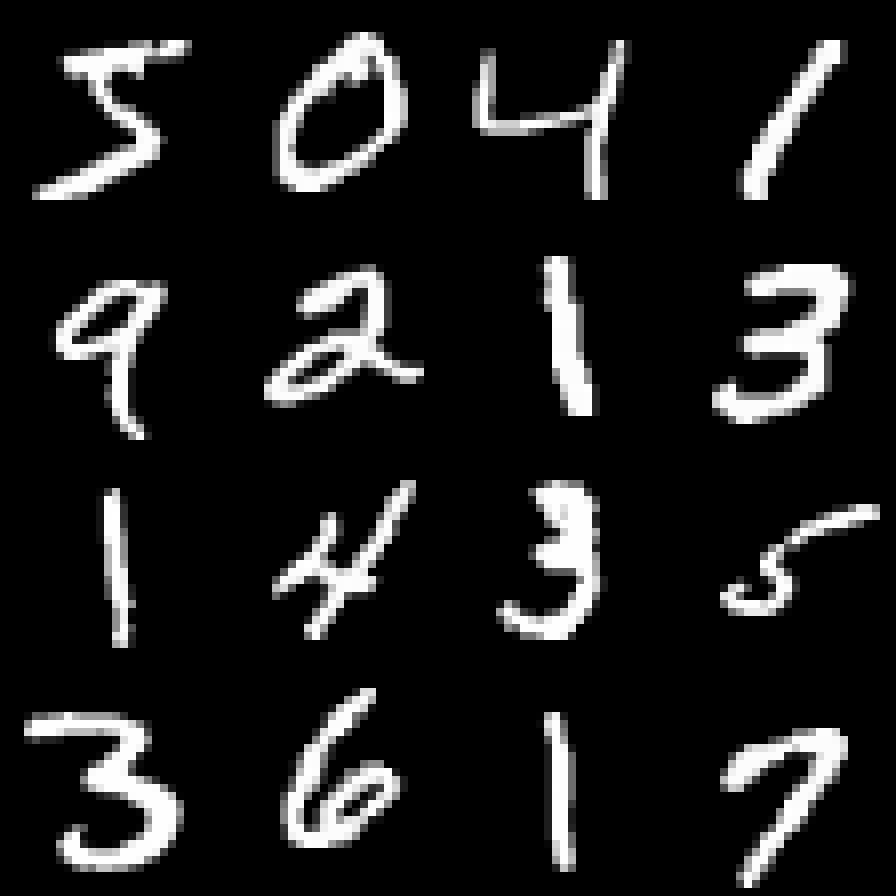

In [3]:
from IPython.display import Image
from PIL import Image
import numpy as np
a = np.concatenate(x_train[0:4], axis=1)
print(" ".join([str(x) for x in y_train[0:4]]))
for i in range(3):
    a = np.concatenate([a, np.concatenate(x_train[4+i*4:8+i*4], axis=1)], axis=0)
    print(" ".join([str(x) for x in y_train[4+i*4:8+i*4]]))
img = Image.fromarray(a, 'L')
img.resize((896, 896), Image.NEAREST)

In [4]:
data_format = K.image_data_format()
rows, cols = 28, 28
num_classes = 10
train_size = x_train.shape[0]
test_size = x_test.shape[0]

if data_format == 'channels_first':
    x_train = x_train.reshape(train_size, 1, rows, cols)
    x_test = x_test.reshape(test_size, 1, rows, cols)
    input_shape = (1, rows, cols)
else:
    x_train = x_train.reshape(train_size, rows, cols, 1)
    x_test = x_test.reshape(test_size, rows, cols, 1)
    input_shape = (rows, cols, 1)
    
# norm data to float in range 0..1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to one hot vector
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
x_train = x_train[:128]
y_train = y_train[:128]

In [6]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


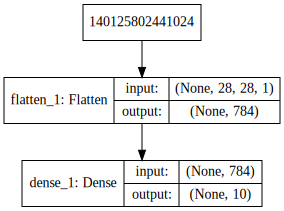

In [7]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [8]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

In [9]:
batch_size = 128
epochs = 20

In [10]:
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Instructions for updating:
Use tf.cast instead.
Train on 128 samples, validate on 10000 samples
Epoch 1/20
128/128 [==============================] - 0s 1ms/step - loss: 2.4042 - acc: 0.1484 - val_loss: 2.3619 - val_acc: 0.1204
Epoch 2/20
128/128 [==============================] - 0s 380us/step - loss: 2.3306 - acc: 0.1484 - val_loss: 2.3174 - val_acc: 0.1380
Epoch 3/20
128/128 [==============================] - 0s 306us/step - loss: 2.2602 - acc: 0.1562 - val_loss: 2.2757 - val_acc: 0.1608
Epoch 4/20
128/128 [==============================] - 0s 312us/step - loss: 2.1929 - acc: 0.2188 - val_loss: 2.2366 - val_acc: 0.1813
Epoch 5/20
128/128 [==============================] - 0s 352us/step - loss: 2.1286 - acc: 0.2578 - val_loss: 2.1998 - val_acc: 0.2022
Epoch 6/20
128/128 [==============================] - 0s 286us/step - loss: 2.0670 - acc: 0.2578 - val_loss: 2.1650 - val_acc: 0.2245
Epoch 7/20
128/128 [==============================] - 0s 322us/step - loss: 2.0080 - acc: 0.3203 - val

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.7674347553253174
Test accuracy: 0.525


In [12]:
from pandas import DataFrame
df_loss = DataFrame(data={
    'Epoche': history.epoch * 2,
    'Legende': ['Loss auf Trainingsdaten'] * len(history.epoch) + ['Loss auf Testdaten'] * len(history.epoch),
    'Loss': history.history['loss'] + history.history['val_loss']
})
df_accuracy = DataFrame(data={
    'Epoche': history.epoch * 2,
    'Legende': ['Accuracy auf Trainingsdaten'] * len(history.epoch) + ['Accuracy auf Testdaten'] * len(history.epoch),
    'Accuracy': history.history['acc'] + history.history['val_acc']
})
print(df_loss)
print(df_accuracy)

    Epoche                  Legende      Loss
0        0  Loss auf Trainingsdaten  2.404172
1        1  Loss auf Trainingsdaten  2.330637
2        2  Loss auf Trainingsdaten  2.260247
3        3  Loss auf Trainingsdaten  2.192935
4        4  Loss auf Trainingsdaten  2.128585
5        5  Loss auf Trainingsdaten  2.067027
6        6  Loss auf Trainingsdaten  2.008049
7        7  Loss auf Trainingsdaten  1.951424
8        8  Loss auf Trainingsdaten  1.896924
9        9  Loss auf Trainingsdaten  1.844340
10      10  Loss auf Trainingsdaten  1.793481
11      11  Loss auf Trainingsdaten  1.744187
12      12  Loss auf Trainingsdaten  1.696324
13      13  Loss auf Trainingsdaten  1.649791
14      14  Loss auf Trainingsdaten  1.604291
15      15  Loss auf Trainingsdaten  1.560231
16      16  Loss auf Trainingsdaten  1.517355
17      17  Loss auf Trainingsdaten  1.475650
18      18  Loss auf Trainingsdaten  1.435117
19      19  Loss auf Trainingsdaten  1.395759
20       0       Loss auf Testdate

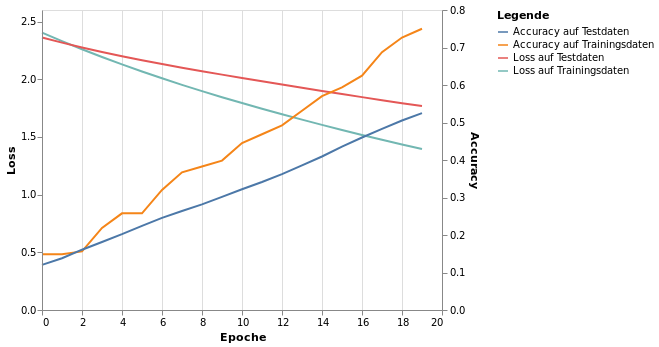

In [13]:
import altair as alt
alt.renderers.enable('notebook')

chart_loss = alt.Chart(df_loss).mark_line().encode(
    x='Epoche', y='Loss', color='Legende')
chart_accuracy = alt.Chart(df_accuracy).mark_line().encode(
    x='Epoche', y='Accuracy', color='Legende')
chart = chart_loss + chart_accuracy
chart.resolve_scale(y='independent')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


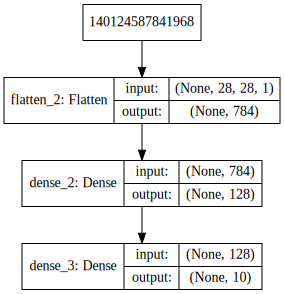

In [14]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [15]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Train on 128 samples, validate on 10000 samples
Epoch 1/20
128/128 [==============================] - 0s 2ms/step - loss: 2.2398 - acc: 0.2969 - val_loss: 2.1717 - val_acc: 0.2775
Epoch 2/20
128/128 [==============================] - 0s 616us/step - loss: 2.0325 - acc: 0.3672 - val_loss: 2.0548 - val_acc: 0.3452
Epoch 3/20
128/128 [==============================] - 0s 545us/step - loss: 1.8473 - acc: 0.5391 - val_loss: 1.9515 - val_acc: 0.4188
Epoch 4/20
128/128 [==============================] - 0s 492us/step - loss: 1.6777 - acc: 0.6641 - val_loss: 1.8595 - val_acc: 0.4763
Epoch 5/20
128/128 [==============================] - 0s 630us/step - loss: 1.5243 - acc: 0.7344 - val_loss: 1.7774 - val_acc: 0.5134
Epoch 6/20
128/128 [==============================] - 0s 648us/step - loss: 1.3847 - acc: 0.7656 - val_loss: 1.7032 - val_acc: 0.5438
Epoch 7/20
128/128 [==============================] - 0s 665us/step - loss: 1.2571 - acc: 0.8125 - val_loss: 1.6350 - val_acc: 0.5677
Epoch 8/20
128/1

In [16]:
def evaluate(model, history):
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    df_loss = DataFrame(data={
        'Epoche': history.epoch * 2,
        'Legende': ['Loss auf Trainingsdaten'] * len(history.epoch) + ['Loss auf Testdaten'] * len(history.epoch),
        'Loss': history.history['loss'] + history.history['val_loss']
    })
    df_accuracy = DataFrame(data={
        'Epoche': history.epoch * 2,
        'Legende': ['Accuracy auf Trainingsdaten'] * len(history.epoch) + ['Accuracy auf Testdaten'] * len(history.epoch),
        'Accuracy': history.history['acc'] + history.history['val_acc']
    })
    chart_loss = alt.Chart(df_loss).mark_line().encode(
        x='Epoche', y='Loss', color='Legende')
    chart_accuracy = alt.Chart(df_accuracy).mark_line().encode(
        x='Epoche', y='Accuracy', color='Legende')
    chart = chart_loss + chart_accuracy
    return chart.resolve_scale(y='independent')

Test loss: 1.118774176311493
Test accuracy: 0.6771


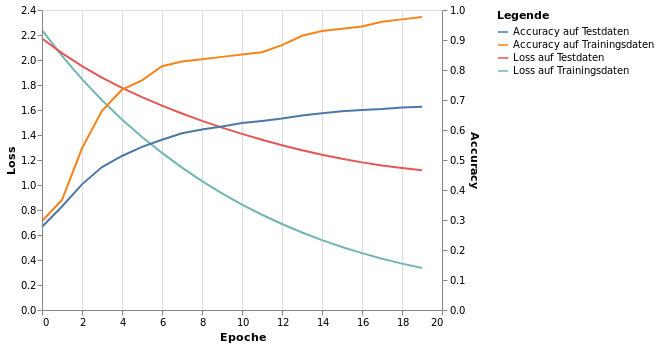

In [17]:
evaluate(model, history)

In [18]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

train_size = x_train.shape[0]
test_size = x_test.shape[0]

data_format = K.image_data_format()
if data_format == 'channels_first':
    x_train = x_train.reshape(train_size, 1, rows, cols)
    x_test = x_test.reshape(test_size, 1, rows, cols)
    input_shape = (1, rows, cols)
else:
    x_train = x_train.reshape(train_size, rows, cols, 1)
    x_test = x_test.reshape(test_size, rows, cols, 1)
    input_shape = (rows, cols, 1)
    
# norm data to float in range 0..1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to one hot vector
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


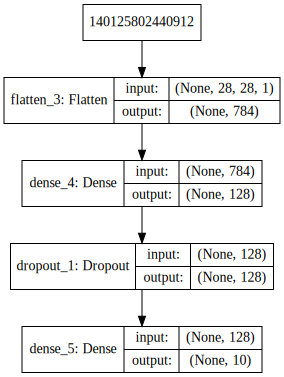

In [19]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [20]:
batch_size = 128
epochs = 12

model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 2s 27us/step - loss: 0.5039 - acc: 0.8516 - val_loss: 0.2146 - val_acc: 0.9361
Epoch 2/12
60000/60000 [==============================] - 1s 24us/step - loss: 0.2609 - acc: 0.9236 - val_loss: 0.1563 - val_acc: 0.9533
Epoch 3/12
60000/60000 [==============================] - 1s 23us/step - loss: 0.2139 - acc: 0.9374 - val_loss: 0.1281 - val_acc: 0.9623
Epoch 4/12
60000/60000 [==============================] - 2s 25us/step - loss: 0.1851 - acc: 0.9461 - val_loss: 0.1138 - val_acc: 0.9651
Epoch 5/12
60000/60000 [==============================] - 1s 25us/step - loss: 0.1679 - acc: 0.9511 - val_loss: 0.1022 - val_acc: 0.9699
Epoch 6/12
60000/60000 [==============================] - 1s 24us/step - loss: 0.1545 - acc: 0.9539 - val_loss: 0.1019 - val_acc: 0.9698
Epoch 7/12
60000/60000 [==============================] - 1s 24us/step - loss: 0.1439 - acc: 0.9567 - val_loss: 0.0907 - val_acc

Test loss: 0.08017215280984528
Test accuracy: 0.9753


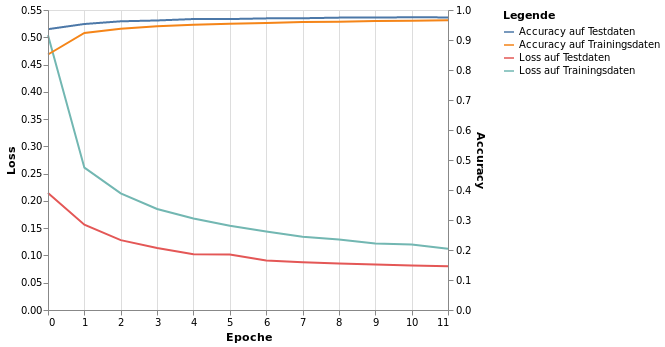

In [21]:
evaluate(model, history)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

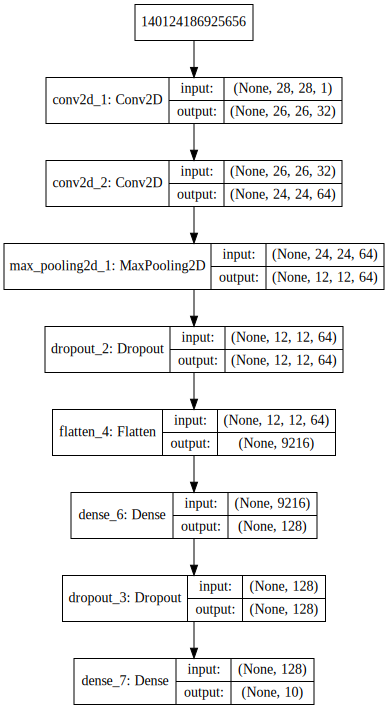

In [22]:
model = Sequential()
model.add(Conv2D(
             32, kernel_size=(3, 3), 
             activation='relu', 
             input_shape=input_shape))
model.add(Conv2D(
             64, kernel_size=(3, 3), 
             activation='relu'))
model.add(MaxPooling2D(
             pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

![Struktur des Convolutional Network](Convnet.svg)

In [23]:
batch_size = 128
epochs = 12

model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 77s 1ms/step - loss: 0.2497 - acc: 0.9239 - val_loss: 0.0545 - val_acc: 0.9829
Epoch 2/12
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0844 - acc: 0.9751 - val_loss: 0.0406 - val_acc: 0.9864
Epoch 3/12
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0650 - acc: 0.9802 - val_loss: 0.0387 - val_acc: 0.9867
Epoch 4/12
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0529 - acc: 0.9838 - val_loss: 0.0329 - val_acc: 0.9886
Epoch 5/12
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0455 - acc: 0.9858 - val_loss: 0.0292 - val_acc: 0.9897
Epoch 6/12
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0393 - acc: 0.9876 - val_loss: 0.0259 - val_acc: 0.9909
Epoch 7/12
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0359 - acc: 0.9880 - val_loss: 0.0250 - val_acc

Test loss: 0.02564258592150827
Test accuracy: 0.9921


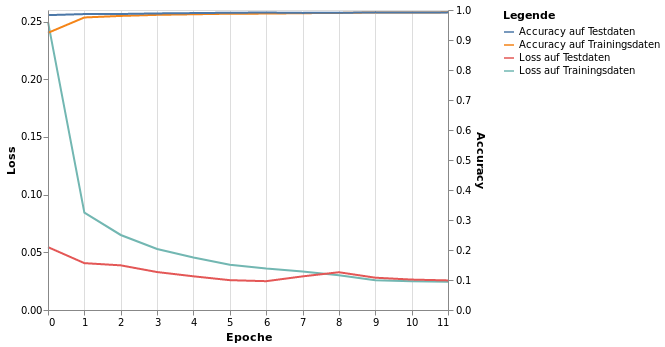

In [24]:
evaluate(model, history)

Schöne 3D-Visualisierung eines Convolutional Networks für MNIST: http://scs.ryerson.ca/~aharley/vis/conv/